In [1]:
import dask
import numpy as np
import xarray as xr
import glob
import matplotlib.pyplot as plt
import time

In [5]:
t0 = time.time()

M03_dir = "/home/savio1/jianwu_common/MODIS_Aggregation/MODIS_one_day_data/"
M06_dir = "/home/savio1/jianwu_common/MODIS_Aggregation/MODIS_one_day_data/"
M03_files = sorted(glob.glob(M03_dir + "MYD03.A2008*.hdf"))
M06_files = sorted(glob.glob(M06_dir + "MYD06_L2.A2008*.hdf"))
total_pix = np.zeros((180, 360))
cloud_pix = np.zeros((180, 360))

In [7]:
len(M03_files)

288

In [10]:
for M03, M06 in zip (M03_files, M06_files):

    #d06 = xr.open_mfdataset(M06[:], parallel=True)['Cloud_Mask_1km'][:,:,:].values
    d06 = xr.open_mfdataset(M06[:])['Cloud_Mask_1km'][:,:,:].values
    d06CM = d06[::3,::3,0]
    ds06_decoded = (np.array(d06CM, dtype = "byte") & 0b00000110) >> 1
    #d03_lat = xr.open_mfdataset(M03[:], drop_variables = "Scan Type", parallel=True)['Latitude'][:,:].values
    #d03_lon = xr.open_mfdataset(M03[:], drop_variables = "Scan Type", parallel=True)['Longitude'][:,:].values
    d03_lat = xr.open_mfdataset(M03[:], drop_variables = "Scan Type")['Latitude'][:,:].values
    d03_lon = xr.open_mfdataset(M03[:], drop_variables = "Scan Type")['Longitude'][:,:].values

    lat = d03_lat[::3,::3]
    lon = d03_lon[::3,::3]

    l_index = (lat + 89.5).astype(int).reshape(lat.shape[0]*lat.shape[1])
    lat_index = np.where(l_index > -1, l_index, 0)
    ll_index = (lon + 179.5).astype(int).reshape(lon.shape[0]*lon.shape[1])
    lon_index = np.where(ll_index > -1, ll_index, 0)
    for i, j in zip(lat_index, lon_index):
        total_pix[i,j] += 1

    indicies = np.nonzero(ds06_decoded <= 0)
    row_i = indicies[0]
    column_i = indicies[1]
    cloud_lon = [lon_index.reshape(ds06_decoded.shape[0],ds06_decoded.shape[1])[i,j] for i, j in zip(row_i, column_i)]
    cloud_lat = [lat_index.reshape(ds06_decoded.shape[0],ds06_decoded.shape[1])[i,j] for i, j in zip(row_i, column_i)]

    for x, y in zip(cloud_lat, cloud_lon):
        cloud_pix[int(x),int(y)] += 1

876.5687637329102


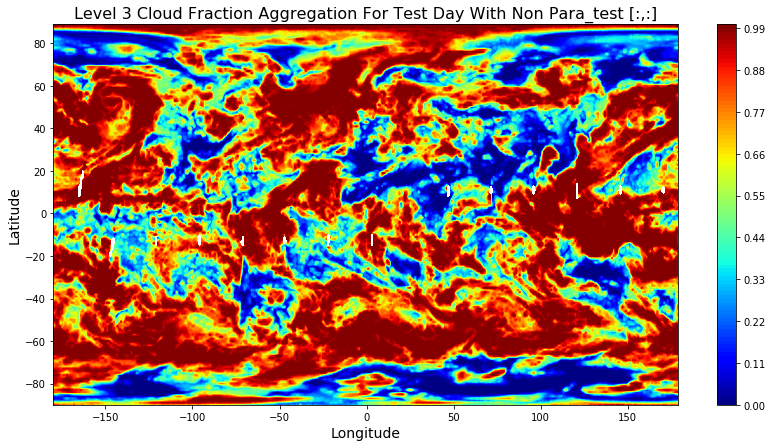

In [11]:
cf = cloud_pix/total_pix
plt.figure(figsize=(14,7))
plt.contourf(range(-180,180), range(-90,90), cf, 100, cmap = "jet")
plt.xlabel("Longitude", fontsize = 14)
plt.ylabel("Latitude", fontsize = 14)
plt.title("Level 3 Cloud Fraction Aggregation For Test Day With Non Para_test [:,:]", fontsize = 16)
plt.colorbar()
plt.savefig("/home/savio1/jianwu_common/MODIS_Aggregation/savioexe/test/NParatest.png")
cf1 = xr.DataArray(cf)
cf1.to_netcdf("/home/savio1/jianwu_common/MODIS_Aggregation/savioexe/test/NParatest.hdf")
t1 = time.time()
total = t1-t0
print(total)

In [12]:
!ls

run_sub1_n12.slurm	   run_sub3_n4_test.slurm    slurm_sub3_n12.err
run_sub1_n1.slurm	   run_sub3_n6.slurm	     slurm_sub3_n12.out
run_sub1_n4_comp.slurm	   run_sub3_n9.slurm	     slurm_sub3_n1.err
run_sub1_n4.slurm	   slurm_sub01_comp.err      slurm_sub3_n1.out
run_sub1_n6.slurm	   slurm_sub01_comp.out      slurm_sub3_n6.err
run_sub1_n9.slurm	   slurm_sub1.err	     slurm_sub3_n6.out
run_sub2_n12.slurm	   slurm_sub1_n12_test1.err  slurm_sub3_n9.err
run_sub2_n1.slurm	   slurm_sub1_n12_test1.out  slurm_sub3_n9.out
run_sub2_n4.slurm	   slurm_sub1_n12_test.err   slurm_sub3.out
run_sub2_n6.slurm	   slurm_sub1_n12_test.out   Sub1_CF_comp.py
run_sub2_n9.slurm	   slurm_sub1_n4_test.err    Sub1_CF.py
run_sub3_n12.slurm	   slurm_sub1_n4_test.out    Sub2_CF.py
run_sub3_n12_test12.slurm  slurm_sub1.out	     Sub3_CF.py
run_sub3_n1.slurm	   slurm_sub2.err	     Sub3_CF_test.py
run_sub3_n1_test.slurm	   slurm_sub2.out	     Untitled.ipynb
run_sub3_n4.slurm	   slurm_sub3.err


In [13]:
!ls

run_sub1_n12.slurm	   run_sub3_n4_test.slurm    slurm_sub3_n12.err
run_sub1_n1.slurm	   run_sub3_n6.slurm	     slurm_sub3_n12.out
run_sub1_n4_comp.slurm	   run_sub3_n9.slurm	     slurm_sub3_n1.err
run_sub1_n4.slurm	   slurm_sub01_comp.err      slurm_sub3_n1.out
run_sub1_n6.slurm	   slurm_sub01_comp.out      slurm_sub3_n6.err
run_sub1_n9.slurm	   slurm_sub1.err	     slurm_sub3_n6.out
run_sub2_n12.slurm	   slurm_sub1_n12_test1.err  slurm_sub3_n9.err
run_sub2_n1.slurm	   slurm_sub1_n12_test1.out  slurm_sub3_n9.out
run_sub2_n4.slurm	   slurm_sub1_n12_test.err   slurm_sub3.out
run_sub2_n6.slurm	   slurm_sub1_n12_test.out   Sub1_CF_comp.py
run_sub2_n9.slurm	   slurm_sub1_n4_test.err    Sub1_CF.py
run_sub3_n12.slurm	   slurm_sub1_n4_test.out    Sub2_CF.py
run_sub3_n12_test12.slurm  slurm_sub1.out	     Sub3_CF.py
run_sub3_n1.slurm	   slurm_sub2.err	     Sub3_CF_test.py
run_sub3_n1_test.slurm	   slurm_sub2.out	     Untitled.ipynb
run_sub3_n4.slurm	   slurm_sub3.err
